C:\Users\SHILPA\AppData\Local\Temp\ipykernel_19316\659879904.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


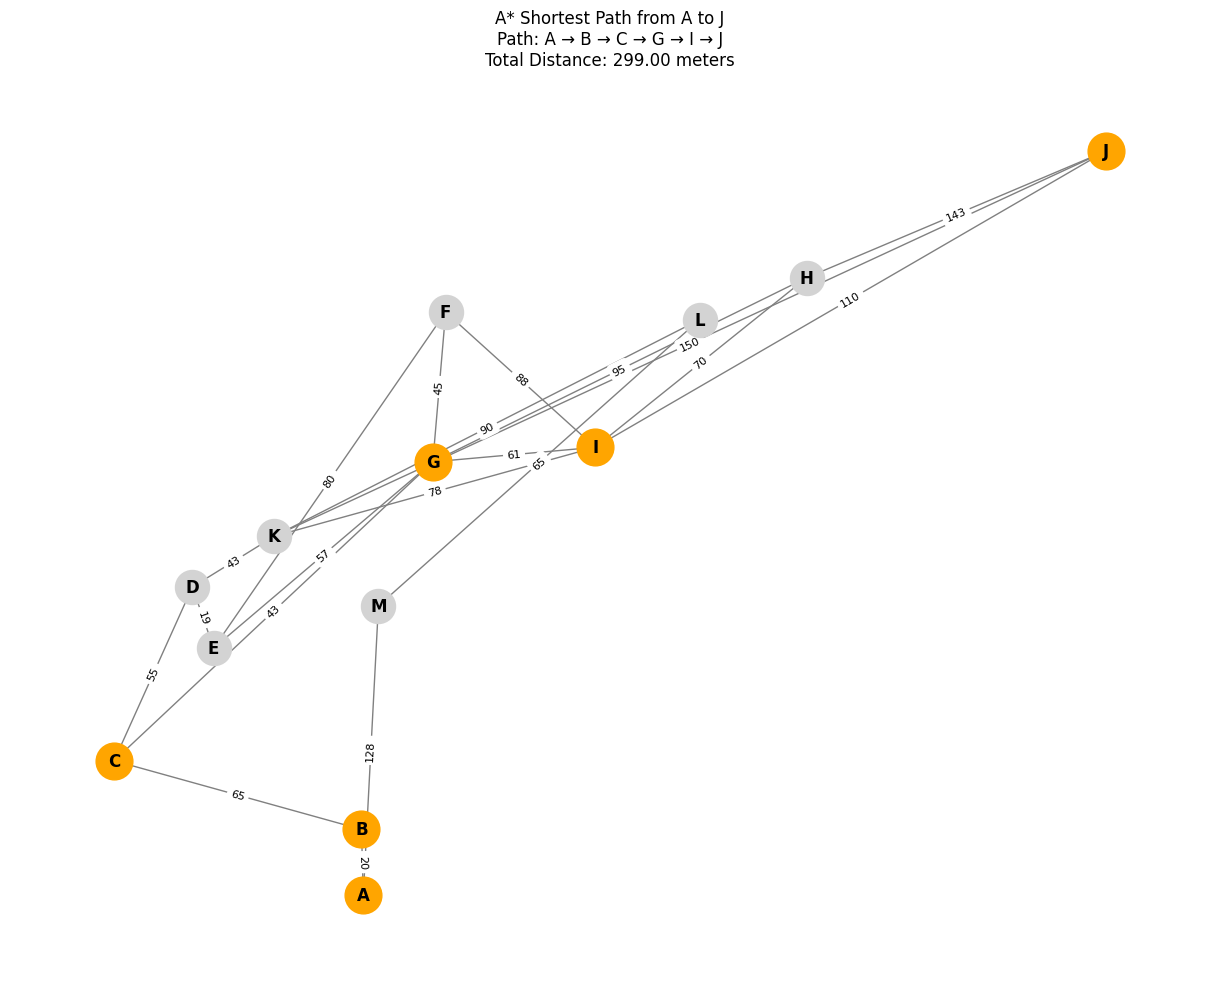

In [6]:

import networkx as nx
import matplotlib.pyplot as plt
import math

# --- Step 1: Define Points with Coordinates (lat, lon) ---
points = {
    'A': (-37.8156505, 145.2294636),
    'B': (-37.8154740, 145.2294588),
    'C': (-37.8152886, 145.2288074),
    'D': (-37.8148201, 145.2290135),
    'E': (-37.8149849, 145.2290695),
    'F': (-37.8140786, 145.2296805),
    'G': (-37.8144825, 145.2296467),
    'H': (-37.8139861, 145.2306309),
    'I': (-37.8144433, 145.2300744),
    'J': (-37.8136444, 145.2314192),
    'K': (-37.8146830, 145.2292295),
    'L': (-37.8140991, 145.2303492),
    'M': (-37.8148709, 145.2295034)
}

# --- Step 2: Define Segments and Distances ---
segments = [
    ('A', 'B', 20), ('B', 'C', 65), ('C', 'D', 55), ('D', 'E', 19), ('E', 'F', 80),
    ('F', 'G', 45), ('G', 'H', 95), ('H', 'I', 70), ('I', 'J', 110), ('J', 'K', 150),
    ('K', 'L', 90), ('L', 'M', 65), ('M', 'A', 128), ('D', 'K', 43), ('C', 'G', 43),
    ('E', 'G', 57), ('G', 'I', 61), ('F', 'I', 88), ('K', 'I', 78), ('H', 'J', 143)
]

# --- Step 3: Create the Graph with Positions and Weights ---
G = nx.Graph()
for point, (lat, lon) in points.items():
    G.add_node(point, pos=(lon, lat))  # Note: lon = x-axis, lat = y-axis for plotting
for u, v, dist in segments:
    G.add_edge(u, v, weight=dist)

# --- Step 4: Define Euclidean Heuristic Function ---
def euclidean_heuristic(a, b):
    ax, ay = points[a][1], points[a][0]
    bx, by = points[b][1], points[b][0]
    return math.hypot(bx - ax, by - ay) * 100000  # Approximate meters

# --- Step 5: A* Algorithm Function ---
def a_star(graph, start, goal):
    open_set = [(0 + euclidean_heuristic(start, goal), 0, start, [])]
    visited = set()

    while open_set:
        f, g, current, path = open_set.pop(0)
        if current in visited:
            continue
        visited.add(current)
        path = path + [current]
        if current == goal:
            return path, g

        for neighbor in graph.neighbors(current):
            weight = graph[current][neighbor]['weight']
            if neighbor not in visited:
                new_g = g + weight
                new_f = new_g + euclidean_heuristic(neighbor, goal)
                open_set.append((new_f, new_g, neighbor, path))
        open_set.sort()  # sort by f-value
    return None, float('inf')

# --- Step 6: Run A* from A to J ---
shortest_path, total_cost = a_star(G, 'A', 'J')

# --- Step 7: Visualise the Map and Path ---
plt.figure(figsize=(12, 9))
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_color='lightgray', edge_color='gray', node_size=600, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'), font_size=8)
path_edges = list(zip(shortest_path[:-1], shortest_path[1:]))
# nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=3)
nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color='orange', node_size=700)
plt.title(f"A* Shortest Path from A to J\nPath: {' → '.join(shortest_path)}\nTotal Distance: {total_cost:.2f} meters")
plt.axis("off")
plt.tight_layout()
plt.show()
